**A way to apply role for loan and  receive application when they are approved and accordance with data provided by applicant .Assistant notify the applicant when the loan is approved.**

**Importing Libraies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

**Load the dataset**

In [ ]:
df=pd.read_csv("Loan.csv")
df.shape

(614, 13)

In [ ]:
# First 5 rows of dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#  The information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#  Checking missing values in the dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

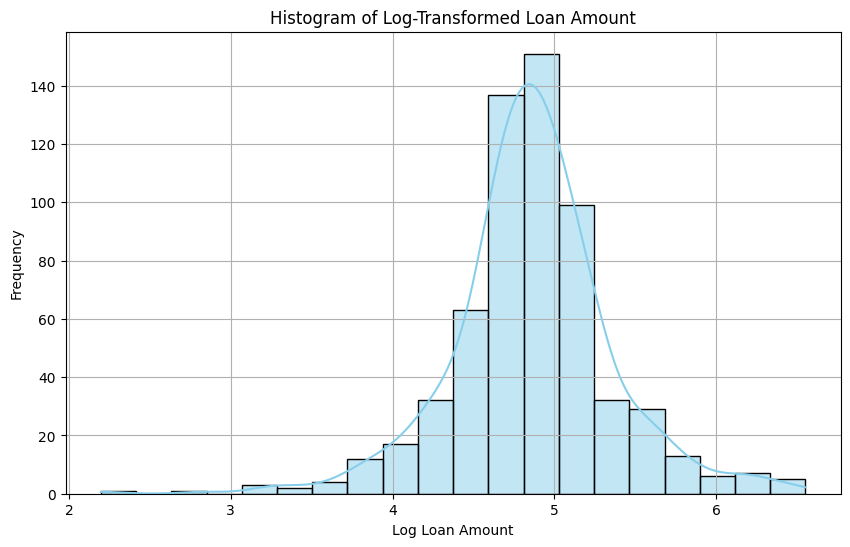

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and np is imported as np

# Create a log-transformed column
df['loanAmount_log'] = np.log(df['LoanAmount'])

# Create an advanced histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='loanAmount_log', bins=20, kde=True, color='skyblue')
plt.title('Histogram of Log-Transformed Loan Amount')
plt.xlabel('Log Loan Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
dtype: int64

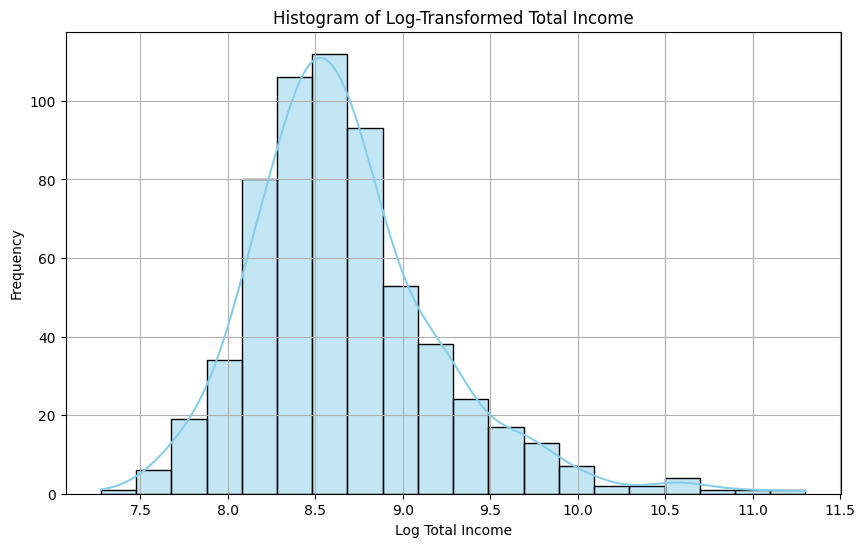

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and np is imported as np

# Create a new column for total income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Create a log-transformed column for total income
df['TotalIncome_log'] = np.log(df['TotalIncome'])

# Create a histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalIncome_log', bins=20, kde=True, color='skyblue')
plt.title('Histogram of Log-Transformed Total Income')
plt.xlabel('Log Total Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Handeling with Null Values in the dataset**

In [ ]:
#  Filling null values
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

df.LoanAmount= df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log= df.loanAmount_log.fillna(df.loanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)


In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

Selecting some specific feature to training and testing the model

In [ ]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values

x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [ ]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [ ]:
# Percentage of missing gender in dataset
print(" Percentage of missing gender is %2f%%" %((df['Gender'].isnull().sum()/df.shape[0])*100))

 Percentage of missing gender is 0.000000%


Number of people who take loan as a group by gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


<ipython-input-94-bb85e98af4cc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender",data=df,palette='Set1')


<Axes: xlabel='Gender', ylabel='count'>

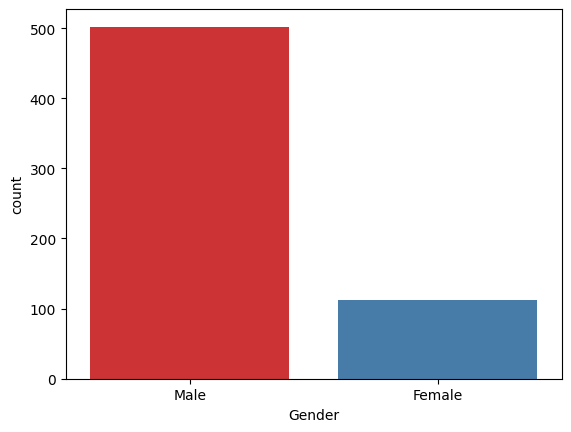

In [ ]:
# Number of people who take loan as a group by gender
print("Number of people who take loan as a group by gender:")
print(df['Gender'].value_counts())
sns.countplot(x="Gender",data=df,palette='Set1')

Number of people who take loan as a group by marital status :
Married
Yes    401
No     213
Name: count, dtype: int64


<ipython-input-95-6a76c678702c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Married",data=df,palette='Set1')


<Axes: xlabel='Married', ylabel='count'>

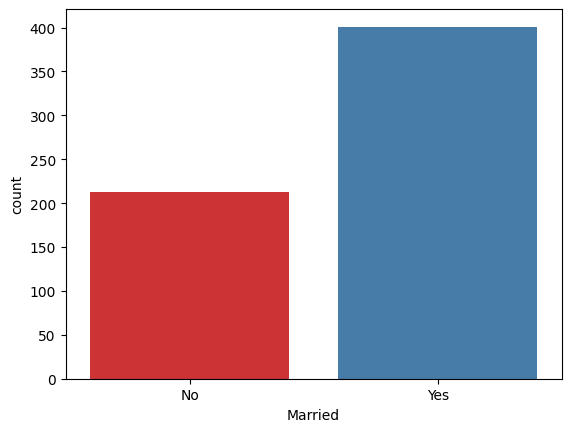

In [ ]:
# Number of people who take loan as a group by marital status
print("Number of people who take loan as a group by marital status :")
print(df['Married'].value_counts())
sns.countplot(x="Married",data=df,palette='Set1')

Number of people who take loan as a group by dependents :
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<ipython-input-96-966846254593>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Dependents",data=df,palette='Set1')


<Axes: xlabel='Dependents', ylabel='count'>

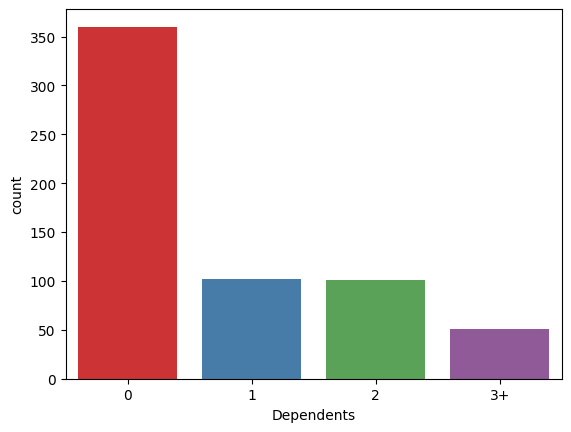

In [ ]:
# Number of people who take loan as a group by dependents
print("Number of people who take loan as a group by dependents :")
print(df['Dependents'].value_counts())
sns.countplot(x="Dependents",data=df,palette='Set1')

Number of people who take loan as a group by self employed :
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<ipython-input-97-f297f4eb9f07>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Self_Employed",data=df,palette='Set1')


<Axes: xlabel='Self_Employed', ylabel='count'>

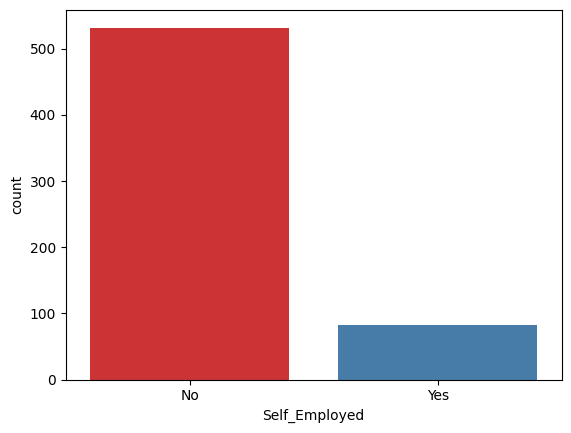

In [ ]:
# Number of people who take loan as a group by self employed
print("Number of people who take loan as a group by self employed :")
print(df['Self_Employed'].value_counts())
sns.countplot(x="Self_Employed",data=df,palette='Set1')

Number of people who take loan as a group by Loan amount :
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


<ipython-input-98-ddcf6fc0d18d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="LoanAmount",data=df,palette='Set1')


<Axes: xlabel='LoanAmount', ylabel='count'>

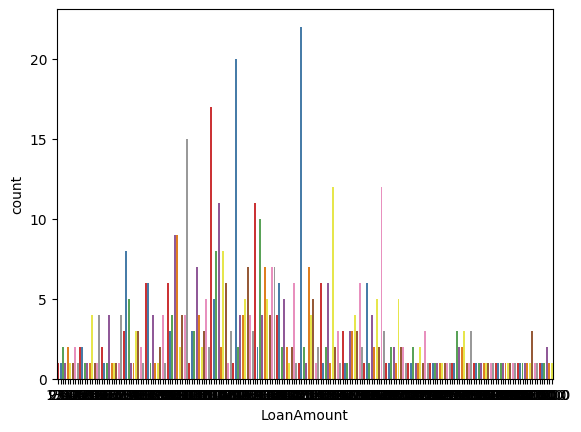

In [ ]:
# Number of people who take loan as a group by Loan amount
print("Number of people who take loan as a group by Loan amount :")
print(df['LoanAmount'].value_counts())
sns.countplot(x="LoanAmount",data=df,palette='Set1')

Number of people who take loan as a group by  Credit History:
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<ipython-input-99-7e6c753a6526>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_History",data=df,palette='Set1')


<Axes: xlabel='Credit_History', ylabel='count'>

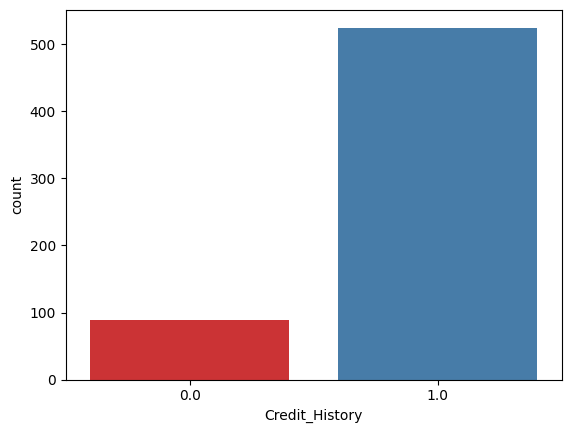

In [ ]:
# Number of people who take loan as a group by Credit History
print("Number of people who take loan as a group by  Credit History:")
print(df['Credit_History'].value_counts())
sns.countplot(x="Credit_History",data=df,palette='Set1')

In [ ]:
# Remove 'LP' prefix from 'Loan_ID' column
df['Loan_ID'] = df['Loan_ID'].str.replace('LP', '')

# Convert 'Loan_ID' to numerical
df['Loan_ID'] = pd.to_numeric(df['Loan_ID'])

# Display the modified DataFrame
print(df.head())


   Loan_ID Gender Married Dependents     Education Self_Employed  \
0     1002   Male      No          0      Graduate            No   
1     1003   Male     Yes          1      Graduate            No   
2     1005   Male     Yes          0      Graduate           Yes   
3     1006   Male     Yes          0  Not Graduate            No   
4     1008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  loanAmount_log  TotalIncome  \
0             1.0         Urban           Y        4.857444       5849.0   
1           

In [ ]:
# Replace specific categorical values with numerical representations
df = df.replace({'Male': 1, 'Female': 0,
                 'Yes': 1, 'No': 0,
                 'Graduate': 1, 'Not Graduate': 0,
                 'Urban': 1, 'Semiurban': 2, 'Rural': 3,
                 'Y': 1, 'N': 0,
                 '3+': 3})

# Convert the remaining columns to numeric type
df = df.apply(pd.to_numeric, errors='ignore')

# Display the modified DataFrame
print(df.head())


   Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0     1002       1        0           0          1              0   
1     1003       1        1           1          1              0   
2     1005       1        1           0          1              1   
3     1006       1        1           0          0              0   
4     1008       1        0           0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History  Property_Area  Loan_Status  loanAmount_log  TotalIncome  \
0             1.0              1            1        4.857444       5849.0   
1 

**Training and Testing the dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()

In [ ]:
#  Transport N test data for training
for i in range(0,5):
  X_train[:,i]=Labelencoder_x.fit_transform(X_train[:,i])
  X_train[:,7]=Labelencoder_x.fit_transform(X_train[:,7])

X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [ ]:
Labelencoder_y=LabelEncoder()
y_train=Labelencoder_y.fit_transform(y_train)

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
# Doing same task for testing dataset

for i in range(0,5):
  X_test[:,i]=Labelencoder_x.fit_transform(X_test[:,i])
  X_test[:,7]=Labelencoder_x.fit_transform(X_test[:,7])

X_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [ ]:
Labelencoder_y=LabelEncoder()
y_test=Labelencoder_y.fit_transform(y_test)

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

Seeing which classifier is best based on accuracy

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn import metrics

y_pred=rf_clf.predict(X_test)

print("Accuracy Of Random Forest Classifier is  ", metrics.accuracy_score(y_pred,y_test))

y_pred

Accuracy Of Random Forest Classifier is   0.7723577235772358


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

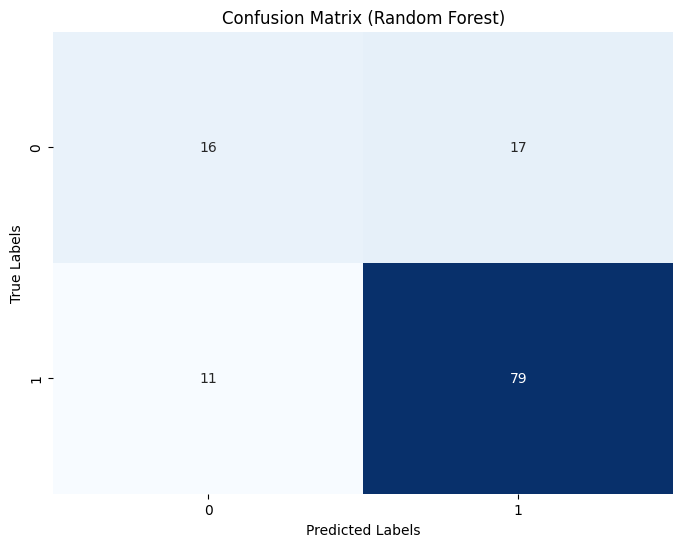

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

# Calculate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_clf=GaussianNB()
nb_clf.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=nb_clf.predict(X_test)
print("Accuracy of Naive bayes is ", metrics.accuracy_score(y_pred,y_test))

Accuracy of Naive bayes is  0.8292682926829268


In [ ]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

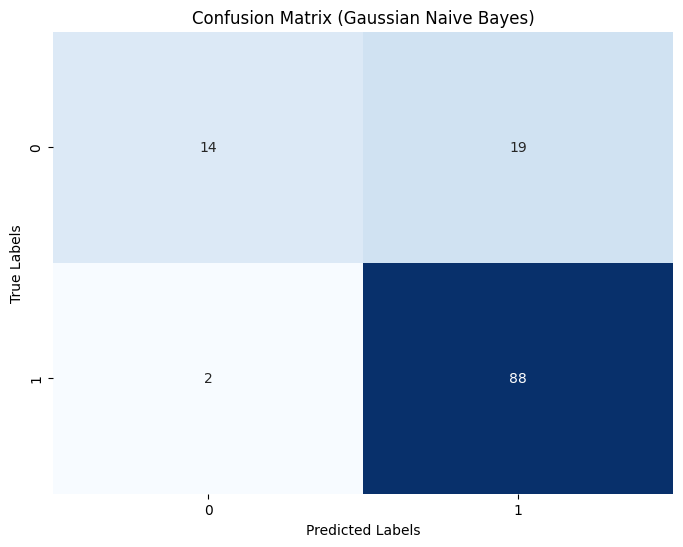

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_nb = nb_clf.predict(X_test)

# Calculate confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Gaussian Naive Bayes)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


**Decision Tree**

In [ ]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt_clf.predict(X_test)
print("Accuracy of Decision Tree is ", metrics.accuracy_score(y_pred,y_test))

Accuracy of Decision Tree is  0.7235772357723578


In [ ]:
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

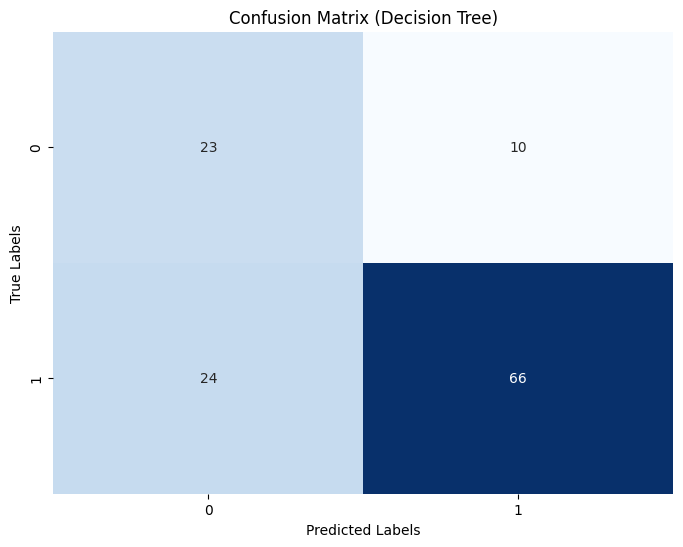

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_dt = dt_clf.predict(X_test)

# Calculate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


**KNeighbors Classifier**

In [ ]:
#  KNN

from sklearn.neighbors import KNeighborsClassifier

kn_clf=KNeighborsClassifier()
kn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=kn_clf.predict(X_test)
print("Accuracy of KN is ", metrics.accuracy_score(y_pred,y_test))

Accuracy of KN is  0.7967479674796748


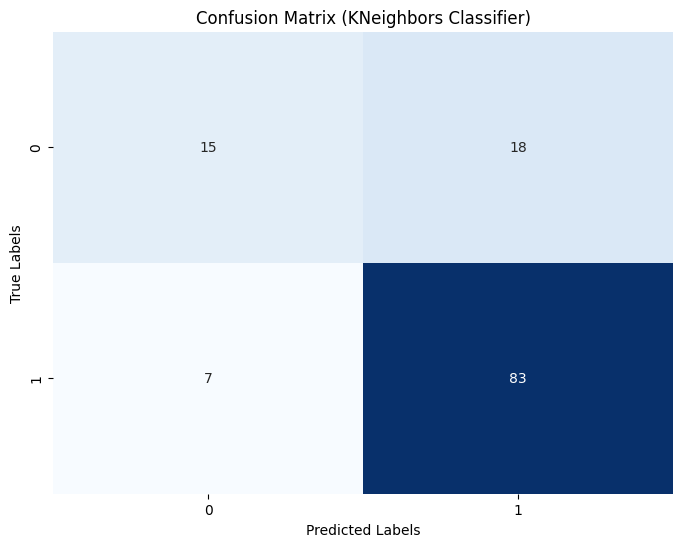

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_kn = kn_clf.predict(X_test)

# Calculate confusion matrix
conf_matrix_kn = confusion_matrix(y_test, y_pred_kn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_kn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (KNeighbors Classifier)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
import numpy as np

# Assuming you have the input data stored in 'input_data'
input_data = [1, 1, 1, 0, 4583, 1508, 128, 360]  # Adjusted input data without the target variable

# Convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the input data to match the shape expected by the model
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make predictions on the input data
output_prediction = nb_clf.predict(input_data_reshaped)

# Check if the prediction is 0 or not
if output_prediction == 0:
    print("Loan is not approved.")
else:
    print("Loan is approved.")


Loan is not approved.
